## Mongo Connection

Mongo connection string consists of ip and port of the server on which your mongo is running.

My mongo is running on a docker container on server ->
   * **ip:   192.168.18.4** 
   * **port:  27017**

and model requests is the name of my collection inside a db

In [2]:
from pymongo import MongoClient


connectionString = "mongodb://192.168.18.4:27017/model_requests";
client = MongoClient(connectionString)

I inserted some testing values in db from docker container for test purpose so that I know that mongo is connected properly with my machine or not. 

Cell below will list all the entries inside the mongo db which I inserted

In [3]:

db = client.model_requests #test is my database
col = db.req #Here spam is my collection
array = [i['_id'] for i in col.find()]
print(array)

[ObjectId('60c4ef75dd0bb78ad0828b89'), ObjectId('60c4f456dd0bb78ad0828b8a'), ObjectId('60c4fd56c2ad788fb3e92694'), ObjectId('60c4fdf7c2ad788fb3e92695'), ObjectId('60c4fe5ec2ad788fb3e92696'), ObjectId('60c4ff13c2ad788fb3e92697'), ObjectId('60c50c93c2ad788fb3e92699')]


# Adding a base64 image to our mongo database

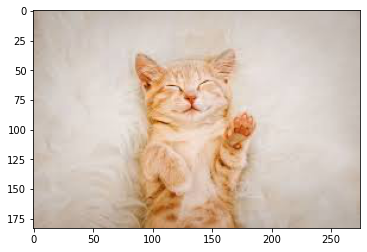

Image ID : 33385


In [33]:
from pymongo import MongoClient
from PIL import Image
import io, random
import matplotlib.pyplot as plt

# Reading Image
im          = Image.open("docs/cat.jpeg")

# Converting Image to baes64
image_bytes = io.BytesIO()
im.save(image_bytes, format='JPEG')

# Generating a random ID from which we can store our new Request
random_id   = int(random.random()*100000)

# Showing Image
plt.imshow(im)
plt.show()

image = {
    'request_id': random_id,
    'base64': image_bytes.getvalue()
}

image_id = col.insert_one(image).inserted_id

print(f"Image ID : {random_id}")

# Get Results

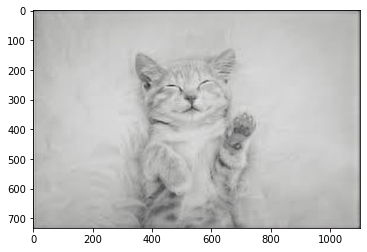

In [9]:
#Querying the saved Image back Just for testing
query_results = list(col.find({"request_id": random_id}))
base64_image  = query_results[0]['results']

# Converting the base64 image back to Pil object.
pil_img = Image.open(io.BytesIO(base64_image))

# Displaying Image
plt.imshow(pil_img)
plt.show()

